# Import Required Libraries


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine, make_moons
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (adjusted_rand_score, silhouette_score, v_measure_score,
                             davies_bouldin_score, calinski_harabasz_score, fowlkes_mallows_score,
                             adjusted_mutual_info_score)
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Data Loading and Preprocessing

In [ ]:
# Load Wine Dataset
wine_data = load_wine()
X_wine = wine_data.data
y_wine = wine_data.target

# Load Two Moons Dataset
X_moons, y_moons = make_moons(n_samples=500, noise=0.1)

# Scale both datasets
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)
X_moons_scaled = scaler.fit_transform(X_moons)



# Visualisation of True Lables

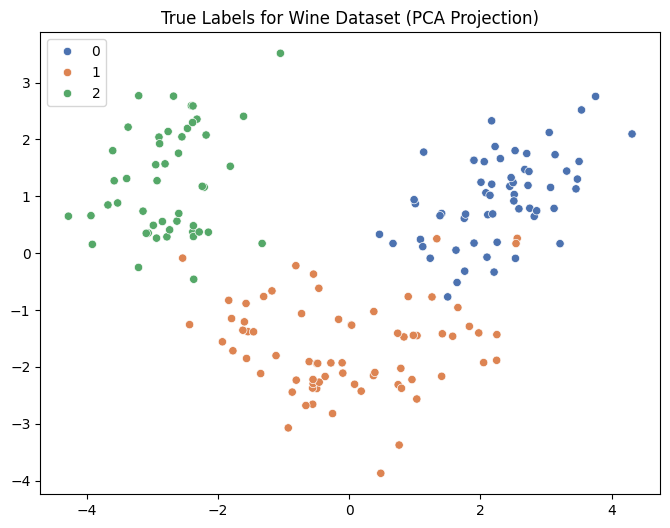

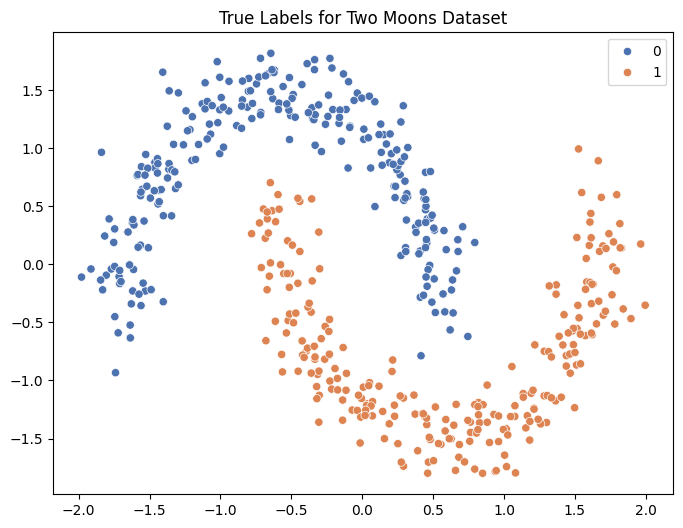

In [ ]:
# PCA for dimensionality reduction (Wine dataset)
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(X_wine_scaled)

# Visualization of True Labels for Wine Dataset
plt.figure(figsize=(8,6))
sns.scatterplot(x=wine_pca[:,0], y=wine_pca[:,1], hue=y_wine, palette='deep', legend='full')
plt.title("True Labels for Wine Dataset (PCA Projection)")
plt.show()

# Visualization of True Labels for Two Moons Dataset
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_moons_scaled[:,0], y=X_moons_scaled[:,1], hue=y_moons, palette='deep', legend='full')
plt.title("True Labels for Two Moons Dataset")
plt.show()


# Estimating the Number of Clusters by Elbow Method

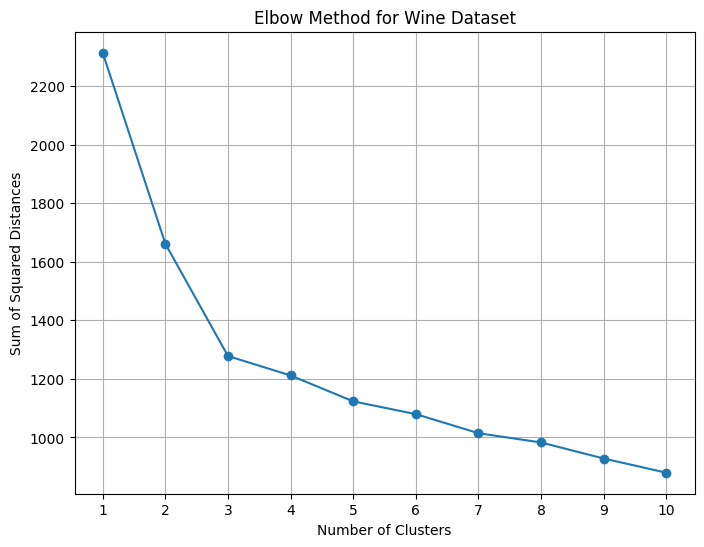

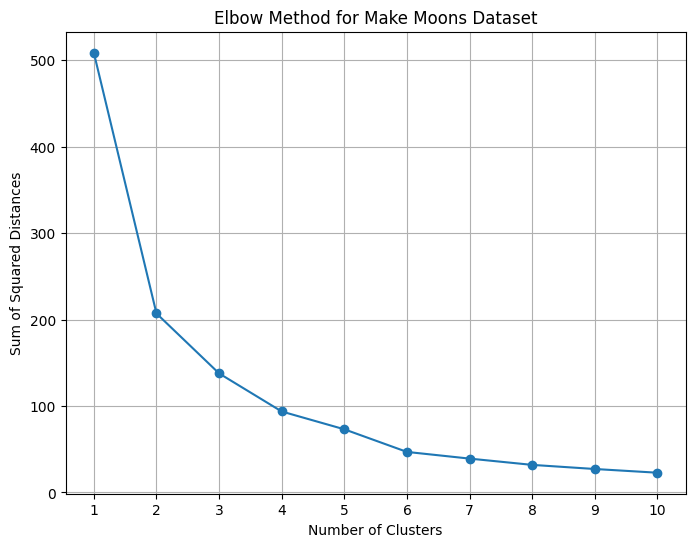

In [ ]:
# Function to calculate inertia for different number of clusters
def plot_elbow_method(X, max_clusters=10, dataset_name=""):
    inertia_values = []
    cluster_range = range(1, max_clusters+1)

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        kmeans.fit(X)
        inertia_values.append(kmeans.inertia_)

    # Plotting the Elbow Method graph
    plt.figure(figsize=(8, 6))
    plt.plot(cluster_range, inertia_values, marker='o')
    plt.title(f'Elbow Method for {dataset_name} Dataset')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Squared Distances')
    plt.xticks(ticks=range(1, max_clusters+1))
    plt.grid(True)
    plt.show()

# Elbow Method for the Wine dataset
plot_elbow_method(X_wine_scaled, max_clusters=10, dataset_name="Wine")

# Elbow Method for the Make Moons dataset
plot_elbow_method(X_moons, max_clusters=10, dataset_name="Make Moons")


# Estimating the Number of Clusters by Silhouette Scores

Wine Dataset Silhouette Scores Table:
   Number of Clusters  Silhouette Score
0                   2          0.265033
1                   3          0.284859
2                   4          0.254228
3                   5          0.183621
4                   6          0.168992
5                   7          0.172602
6                   8          0.162504
7                   9          0.173874
8                  10          0.139567

Make Moons Dataset Silhouette Scores Table:
   Number of Clusters  Silhouette Score
0                   2          0.481647
1                   3          0.420934
2                   4          0.436279
3                   5          0.452964
4                   6          0.507138
5                   7          0.489393
6                   8          0.478311
7                   9          0.475852
8                  10          0.468394


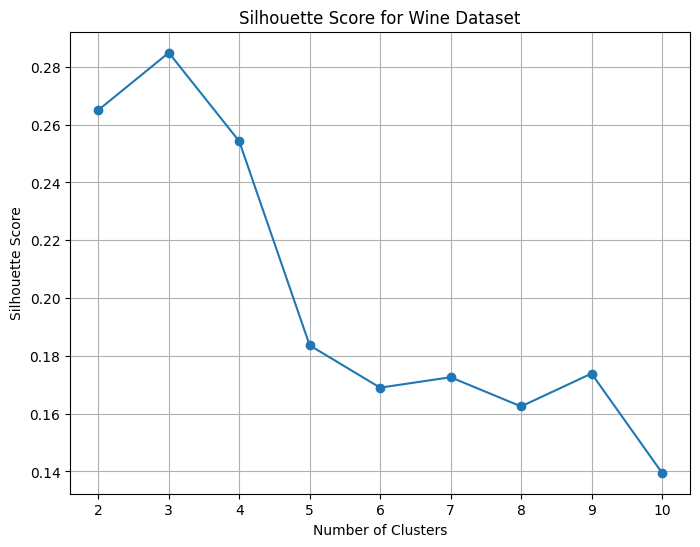

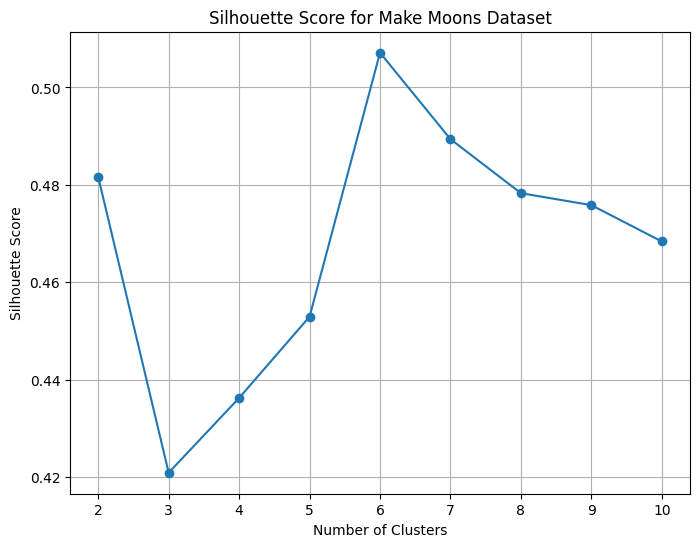

In [ ]:
# Function to calculate silhouette scores for different number of clusters and return as a DataFrame
def silhouette_scores_table(X, max_clusters=10, dataset_name=""):
    silhouette_scores = []
    cluster_range = range(2, max_clusters+1)

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        clusters = kmeans.fit_predict(X)
        score = silhouette_score(X, clusters)
        silhouette_scores.append(score)

    # Create a DataFrame to store silhouette scores
    df = pd.DataFrame({
        'Number of Clusters': list(cluster_range),
        'Silhouette Score': silhouette_scores
    })

    # Return the DataFrame
    return df

# Silhouette Scores for the Wine dataset and saving to a DataFrame
wine_silhouette_df = silhouette_scores_table(X_wine_scaled, max_clusters=10, dataset_name="Wine")
print("Wine Dataset Silhouette Scores Table:")
print(wine_silhouette_df)

# Silhouette Scores for the Make Moons dataset and saving to a DataFrame
moons_silhouette_df = silhouette_scores_table(X_moons, max_clusters=10, dataset_name="Make Moons")
print("\nMake Moons Dataset Silhouette Scores Table:")
print(moons_silhouette_df)

# Optional: Plotting Silhouette Scores (can still visualize if needed)
def plot_silhouette_scores(X, max_clusters=10, dataset_name=""):
    silhouette_scores = []
    cluster_range = range(2, max_clusters+1)

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        clusters = kmeans.fit_predict(X)
        score = silhouette_score(X, clusters)
        silhouette_scores.append(score)

    # Plotting the Silhouette Scores graph
    plt.figure(figsize=(8, 6))
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title(f'Silhouette Score for {dataset_name} Dataset')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

# Plot the Silhouette Scores for both datasets (optional)
plot_silhouette_scores(X_wine_scaled, max_clusters=10, dataset_name="Wine")
plot_silhouette_scores(X_moons, max_clusters=10, dataset_name="Make Moons")

# Applying K-means and K-means++ on Wine Dataset

Iteration 1 metrics:
 - Adjusted Rand Index: 0.4733
 - Silhouette Score: 0.2038
 - V-measure: 0.5230
 - Davies-Bouldin Index: 1.7282
 - Calinski-Harabasz Index: 52.3176
 - Fowlkes-Mallows Score: 0.6557
 - Adjusted Mutual Info: 0.5179
Iteration 1: Centroid shift = 4.275358
Iteration 2 metrics:
 - Adjusted Rand Index: 0.7263
 - Silhouette Score: 0.2681
 - V-measure: 0.7469
 - Davies-Bouldin Index: 1.4538
 - Calinski-Harabasz Index: 67.0691
 - Fowlkes-Mallows Score: 0.8188
 - Adjusted Mutual Info: 0.7443
Iteration 2: Centroid shift = 0.928859
Iteration 3 metrics:
 - Adjusted Rand Index: 0.7990
 - Silhouette Score: 0.2766
 - V-measure: 0.8074
 - Davies-Bouldin Index: 1.3999
 - Calinski-Harabasz Index: 69.8435
 - Fowlkes-Mallows Score: 0.8667
 - Adjusted Mutual Info: 0.8053
Iteration 3: Centroid shift = 0.324557
Iteration 4 metrics:
 - Adjusted Rand Index: 0.8302
 - Silhouette Score: 0.2806
 - V-measure: 0.8277
 - Davies-Bouldin Index: 1.3967
 - Calinski-Harabasz Index: 70.3861
 - Fowlkes-M

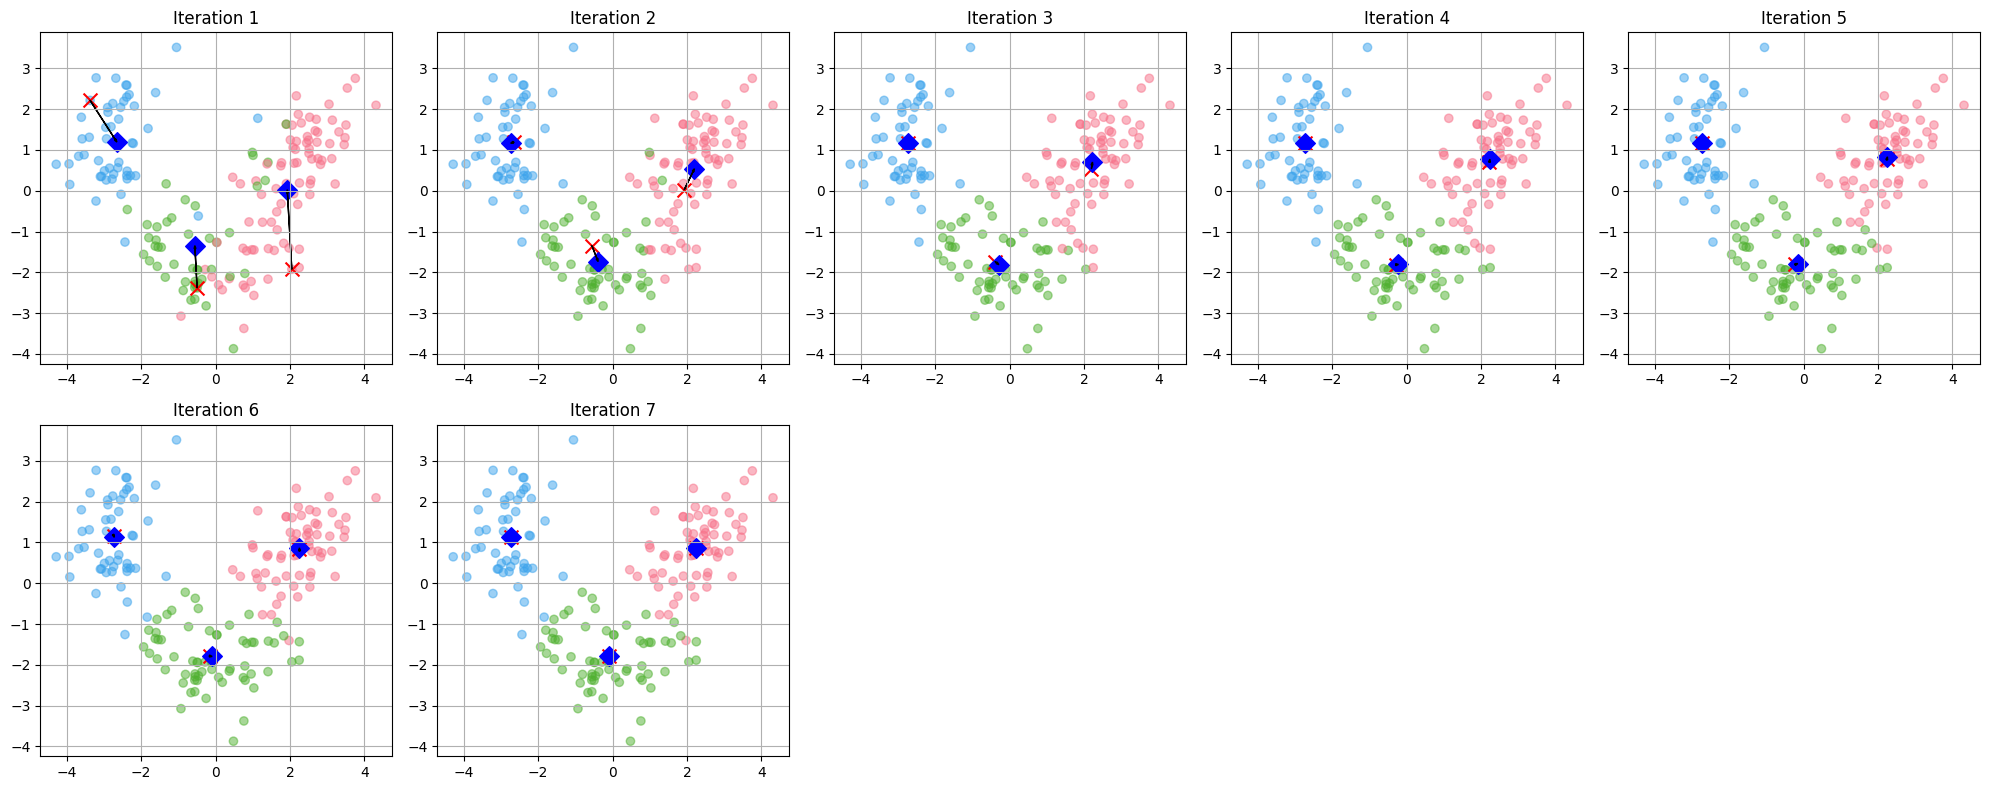

In [ ]:
wine_data = load_wine()
X_wine = wine_data.data
y_wine = wine_data.target  # True labels
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

# Function to calculate Euclidean distance between points
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

# Function to initialize random centroids
def initialize_centroids(X, n_clusters):
    n_samples = X.shape[0]
    centroids = X[np.random.choice(n_samples, n_clusters, replace=False)]
    return centroids

# Function to assign points to the nearest centroid
def assign_clusters(X, centroids):
    distances = np.array([euclidean_distance(X, centroid) for centroid in centroids])
    return np.argmin(distances, axis=0)

# Function to update centroids based on cluster assignments
def update_centroids(X, labels, n_clusters):
    centroids = np.array([X[labels == k].mean(axis=0) for k in range(n_clusters)])
    return centroids

# Function to compute clustering metrics
def compute_metrics(X, labels, true_labels):
    metrics = {}
    metrics['Adjusted Rand Index'] = adjusted_rand_score(true_labels, labels)
    metrics['Silhouette Score'] = silhouette_score(X, labels)
    metrics['V-measure'] = v_measure_score(true_labels, labels)
    metrics['Davies-Bouldin Index'] = davies_bouldin_score(X, labels)
    metrics['Calinski-Harabasz Index'] = calinski_harabasz_score(X, labels)
    metrics['Fowlkes-Mallows Score'] = fowlkes_mallows_score(true_labels, labels)
    metrics['Adjusted Mutual Info'] = adjusted_mutual_info_score(true_labels, labels)
    return metrics

# Updated function to plot centroid shifts in smaller subplots (5 plots per row)
def plot_centroids_shift_multiple(X, labels_list, old_centroids_list, new_centroids_list, iterations):
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X)

    n_rows = (iterations + 4) // 5  # To create rows of 5 plots
    fig, axs = plt.subplots(n_rows, 5, figsize=(20, n_rows * 4))

    # If there's only one row, axs will be 1-dimensional, so handle that case
    if n_rows == 1:
        axs = np.array([axs])  # Make axs a 2D array with one row

    for iteration in range(iterations):
        row = iteration // 5
        col = iteration % 5

        old_centroids = old_centroids_list[iteration]
        new_centroids = new_centroids_list[iteration]
        old_centroids_2d = pca.transform(old_centroids)
        new_centroids_2d = pca.transform(new_centroids)

        # Assigning colors based on labels (clusters)
        palette = sns.color_palette("husl", np.unique(labels_list[iteration]).shape[0])
        colors = [palette[label] for label in labels_list[iteration]]

        ax = axs[row, col]
        ax.scatter(X_2d[:, 0], X_2d[:, 1], c=colors, marker='o', alpha=0.5, label='Data points')
        ax.scatter(old_centroids_2d[:, 0], old_centroids_2d[:, 1], c='red', marker='x', s=100, label='Old centroids')
        ax.scatter(new_centroids_2d[:, 0], new_centroids_2d[:, 1], c='blue', marker='D', s=100, label='New centroids')

        for i in range(old_centroids_2d.shape[0]):
            ax.arrow(old_centroids_2d[i, 0], old_centroids_2d[i, 1],
                     new_centroids_2d[i, 0] - old_centroids_2d[i, 0],
                     new_centroids_2d[i, 1] - old_centroids_2d[i, 1],
                     color='black', length_includes_head=True, head_width=0.05)

        ax.set_title(f'Iteration {iteration + 1}')
        ax.grid(True)

    # Hide unused subplots
    total_plots = n_rows * 5
    for i in range(iterations, total_plots):
        row = i // 5
        col = i % 5
        fig.delaxes(axs[row, col])  # Delete the unused axes

    plt.tight_layout()
    plt.show()

# Modifying the K-means function to collect all centroid shifts for multiple plots
def kmeans_with_shifts_multiple_plots(X, n_clusters, max_iters=100, tol=1e-4, true_labels=None):
    centroids = initialize_centroids(X, n_clusters)

    labels_list = []
    old_centroids_list = []
    new_centroids_list = []

    for iteration in range(max_iters):
        old_centroids = centroids
        labels = assign_clusters(X, centroids)
        centroids = update_centroids(X, labels, n_clusters)

        # Collect labels and centroids for plotting
        labels_list.append(labels)
        old_centroids_list.append(old_centroids)
        new_centroids_list.append(centroids)

        # Compute metrics at each iteration
        if true_labels is not None:
            metrics = compute_metrics(X, labels, true_labels)
            print(f"Iteration {iteration + 1} metrics:")
            for key, value in metrics.items():
                print(f" - {key}: {value:.4f}")
        else:
            print("True labels not provided; skipping metric calculations.")

        # Check for convergence (if centroids have shifted less than tolerance)
        centroid_shift = np.linalg.norm(centroids - old_centroids)
        print(f"Iteration {iteration + 1}: Centroid shift = {centroid_shift:.6f}")
        if centroid_shift < tol:
            print(f"Converged after {iteration + 1} iterations.")
            break

    # Plot all centroid shifts in subplots
    plot_centroids_shift_multiple(X, labels_list, old_centroids_list, new_centroids_list, len(labels_list))

    return labels, centroids

# Running the K-Means algorithm with smaller plots in one big plot
n_clusters = 3
labels, final_centroids = kmeans_with_shifts_multiple_plots(X_wine_scaled, n_clusters, true_labels=y_wine)


Iteration 1 metrics:
 - Adjusted Rand Index: 0.3844
 - Silhouette Score: 0.1580
 - V-measure: 0.4808
 - Davies-Bouldin Index: 2.7165
 - Calinski-Harabasz Index: 38.0961
 - Fowlkes-Mallows Score: 0.5975
 - Adjusted Mutual Info: 0.4753
Iteration 1: Centroid shift = 2.997694
Iteration 2 metrics:
 - Adjusted Rand Index: 0.4786
 - Silhouette Score: 0.2045
 - V-measure: 0.5323
 - Davies-Bouldin Index: 1.8099
 - Calinski-Harabasz Index: 51.3619
 - Fowlkes-Mallows Score: 0.6554
 - Adjusted Mutual Info: 0.5274
Iteration 2: Centroid shift = 1.324713
Iteration 3 metrics:
 - Adjusted Rand Index: 0.7857
 - Silhouette Score: 0.2724
 - V-measure: 0.7587
 - Davies-Bouldin Index: 1.4067
 - Calinski-Harabasz Index: 69.5119
 - Fowlkes-Mallows Score: 0.8576
 - Adjusted Mutual Info: 0.7562
Iteration 3: Centroid shift = 1.103581
Iteration 4 metrics:
 - Adjusted Rand Index: 0.8637
 - Silhouette Score: 0.2814
 - V-measure: 0.8304
 - Davies-Bouldin Index: 1.3904
 - Calinski-Harabasz Index: 70.7447
 - Fowlkes-M

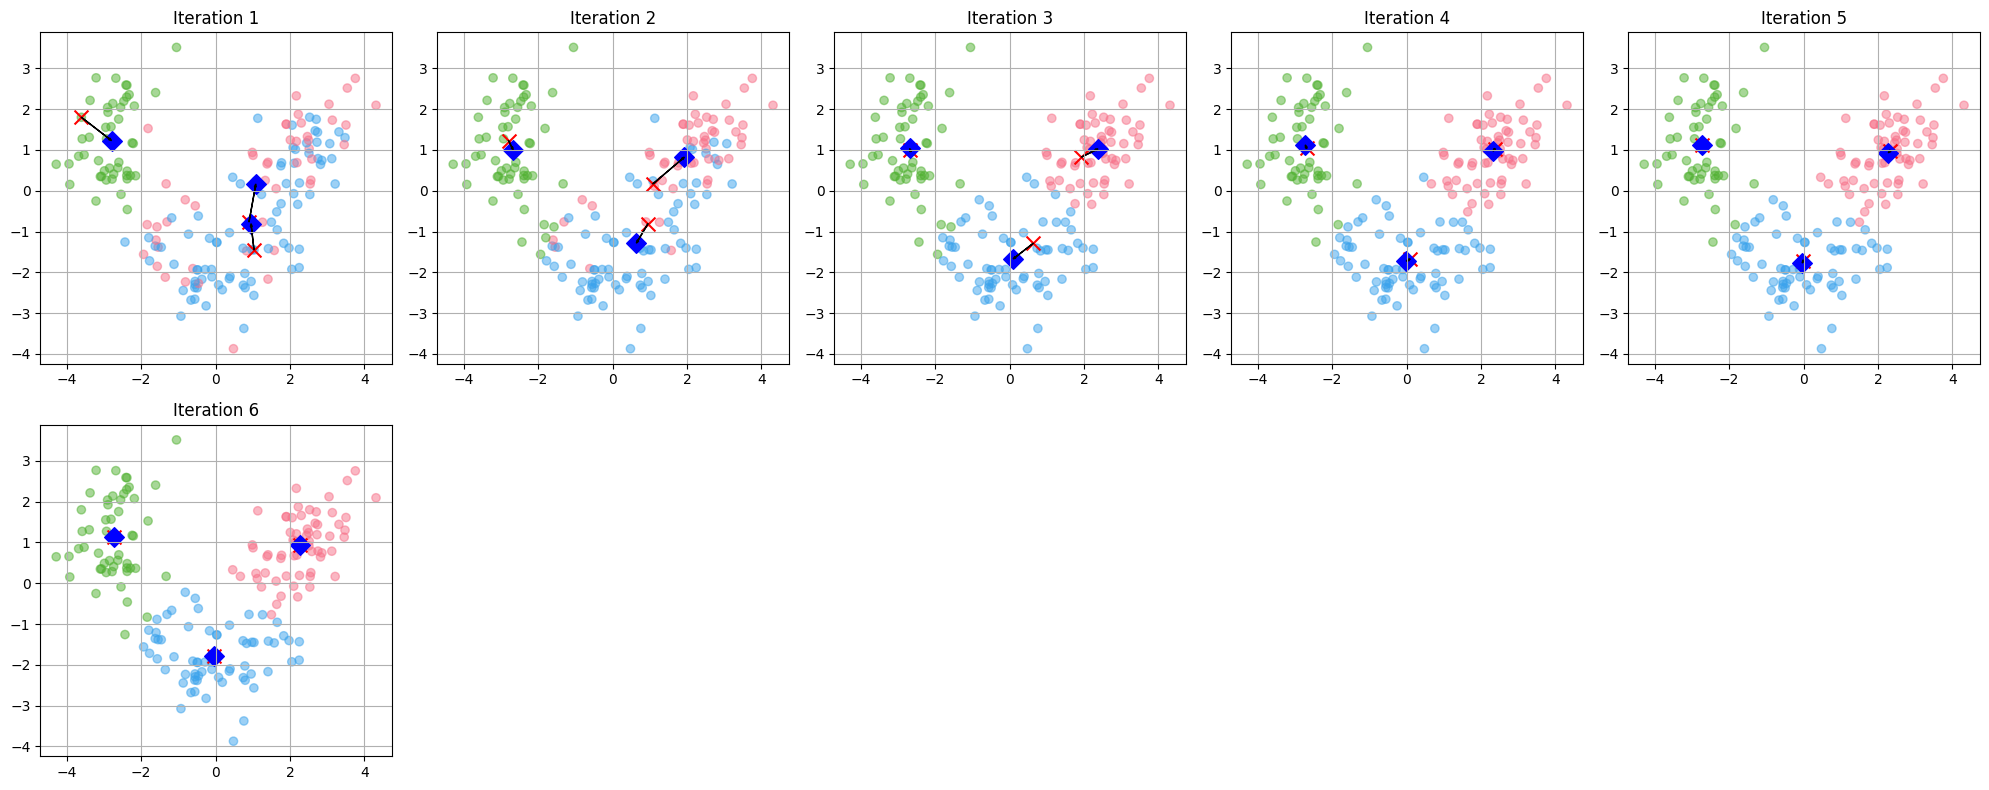

In [ ]:
wine_data = load_wine()
X_wine = wine_data.data
y_wine = wine_data.target  # True labels
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

# Function to calculate Euclidean distance between points
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

# K-Means++ centroid initialization
def initialize_centroids_kmeans_plus(X, n_clusters):
    n_samples, n_features = X.shape
    centroids = []

    # Step 1: Choose the first centroid randomly
    first_centroid = X[np.random.choice(n_samples)]
    centroids.append(first_centroid)

    # Step 2: Choose subsequent centroids based on distance
    for _ in range(1, n_clusters):
        distances = np.array([min([np.linalg.norm(x - c) ** 2 for c in centroids]) for x in X])
        probabilities = distances / distances.sum()
        cumulative_probabilities = np.cumsum(probabilities)
        r = np.random.rand()
        next_centroid = X[np.searchsorted(cumulative_probabilities, r)]
        centroids.append(next_centroid)

    return np.array(centroids)

# Function to assign points to the nearest centroid
def assign_clusters(X, centroids):
    distances = np.array([euclidean_distance(X, centroid) for centroid in centroids])
    return np.argmin(distances, axis=0)

# Function to update centroids
def update_centroids(X, labels, n_clusters):
    centroids = np.array([X[labels == k].mean(axis=0) for k in range(n_clusters)])
    return centroids

# Function to compute clustering metrics
def compute_metrics(X, labels, true_labels):
    metrics = {}
    metrics['Adjusted Rand Index'] = adjusted_rand_score(true_labels, labels)
    metrics['Silhouette Score'] = silhouette_score(X, labels)
    metrics['V-measure'] = v_measure_score(true_labels, labels)
    metrics['Davies-Bouldin Index'] = davies_bouldin_score(X, labels)
    metrics['Calinski-Harabasz Index'] = calinski_harabasz_score(X, labels)
    metrics['Fowlkes-Mallows Score'] = fowlkes_mallows_score(true_labels, labels)
    metrics['Adjusted Mutual Info'] = adjusted_mutual_info_score(true_labels, labels)
    return metrics

# Updated function to plot centroid shifts in smaller subplots (5 plots per row)
def plot_centroids_shift_multiple(X, labels_list, old_centroids_list, new_centroids_list, iterations):
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X)

    n_rows = (iterations + 4) // 5  # To create rows of 5 plots
    fig, axs = plt.subplots(n_rows, 5, figsize=(20, n_rows * 4))

    for iteration in range(iterations):
        row = iteration // 5
        col = iteration % 5

        old_centroids = old_centroids_list[iteration]
        new_centroids = new_centroids_list[iteration]
        old_centroids_2d = pca.transform(old_centroids)
        new_centroids_2d = pca.transform(new_centroids)

        # Assigning colors based on labels (clusters)
        palette = sns.color_palette("husl", np.unique(labels_list[iteration]).shape[0])
        colors = [palette[label] for label in labels_list[iteration]]

        ax = axs[row, col]
        ax.scatter(X_2d[:, 0], X_2d[:, 1], c=colors, marker='o', alpha=0.5, label='Data points')
        ax.scatter(old_centroids_2d[:, 0], old_centroids_2d[:, 1], c='red', marker='x', s=100, label='Old centroids')
        ax.scatter(new_centroids_2d[:, 0], new_centroids_2d[:, 1], c='blue', marker='D', s=100, label='New centroids')

        for i in range(old_centroids_2d.shape[0]):
            ax.arrow(old_centroids_2d[i, 0], old_centroids_2d[i, 1],
                     new_centroids_2d[i, 0] - old_centroids_2d[i, 0],
                     new_centroids_2d[i, 1] - old_centroids_2d[i, 1],
                     color='black', length_includes_head=True, head_width=0.05)

        ax.set_title(f'Iteration {iteration + 1}')
        ax.grid(True)

    # Hide unused subplots
    total_plots = n_rows * 5
    for i in range(iterations, total_plots):
        row = i // 5
        col = i % 5
        fig.delaxes(axs[row, col])  # Delete the unused axes

    plt.tight_layout()
    plt.show()

# Modifying the K-means++ function to collect all centroid shifts for multiple plots
def kmeans_plus_with_shifts_multiple_plots(X, n_clusters, max_iters=100, tol=1e-4, true_labels=None):
    centroids = initialize_centroids_kmeans_plus(X, n_clusters)

    labels_list = []
    old_centroids_list = []
    new_centroids_list = []

    for iteration in range(max_iters):
        old_centroids = centroids
        labels = assign_clusters(X, centroids)
        centroids = update_centroids(X, labels, n_clusters)

        # Collect labels and centroids for plotting
        labels_list.append(labels)
        old_centroids_list.append(old_centroids)
        new_centroids_list.append(centroids)

        # Compute metrics at each iteration
        if true_labels is not None:
            metrics = compute_metrics(X, labels, true_labels)
            print(f"Iteration {iteration + 1} metrics:")
            for key, value in metrics.items():
                print(f" - {key}: {value:.4f}")
        else:
            print("True labels not provided; skipping metric calculations.")

        # Check for convergence (if centroids have shifted less than tolerance)
        centroid_shift = np.linalg.norm(centroids - old_centroids)
        print(f"Iteration {iteration + 1}: Centroid shift = {centroid_shift:.6f}")
        if centroid_shift < tol:
            print(f"Converged after {iteration + 1} iterations.")
            break

    # Plot all centroid shifts in subplots
    plot_centroids_shift_multiple(X, labels_list, old_centroids_list, new_centroids_list, len(labels_list))

    return labels, centroids

# Running the K-Means++ algorithm with visualization of centroid shifts and metric calculations
n_clusters = 3
labels_plus, final_centroids_plus = kmeans_plus_with_shifts_multiple_plots(X_wine_scaled, n_clusters, true_labels=y_wine)


# Applying K-means and K-means++ on Two Moons Dataset

Iteration 1 metrics:
 - Adjusted Rand Index: 0.1286
 - Silhouette Score: 0.2943
 - V-measure: 0.2485
 - Davies-Bouldin Index: 0.9001
 - Calinski-Harabasz Index: 192.8465
 - Fowlkes-Mallows Score: 0.6471
 - Adjusted Mutual Info: 0.2472
Iteration 1: Centroid shift = 0.9474879801986773
Iteration 2 metrics:
 - Adjusted Rand Index: 0.3035
 - Silhouette Score: 0.4077
 - V-measure: 0.2940
 - Davies-Bouldin Index: 0.8747
 - Calinski-Harabasz Index: 444.2427
 - Fowlkes-Mallows Score: 0.6716
 - Adjusted Mutual Info: 0.2929
Iteration 2: Centroid shift = 0.643730805762022
Iteration 3 metrics:
 - Adjusted Rand Index: 0.4292
 - Silhouette Score: 0.4765
 - V-measure: 0.3507
 - Davies-Bouldin Index: 0.8228
 - Calinski-Harabasz Index: 638.0705
 - Fowlkes-Mallows Score: 0.7167
 - Adjusted Mutual Info: 0.3497
Iteration 3: Centroid shift = 0.36066844664209974
Iteration 4 metrics:
 - Adjusted Rand Index: 0.4668
 - Silhouette Score: 0.4863
 - V-measure: 0.3741
 - Davies-Bouldin Index: 0.8164
 - Calinski-Har

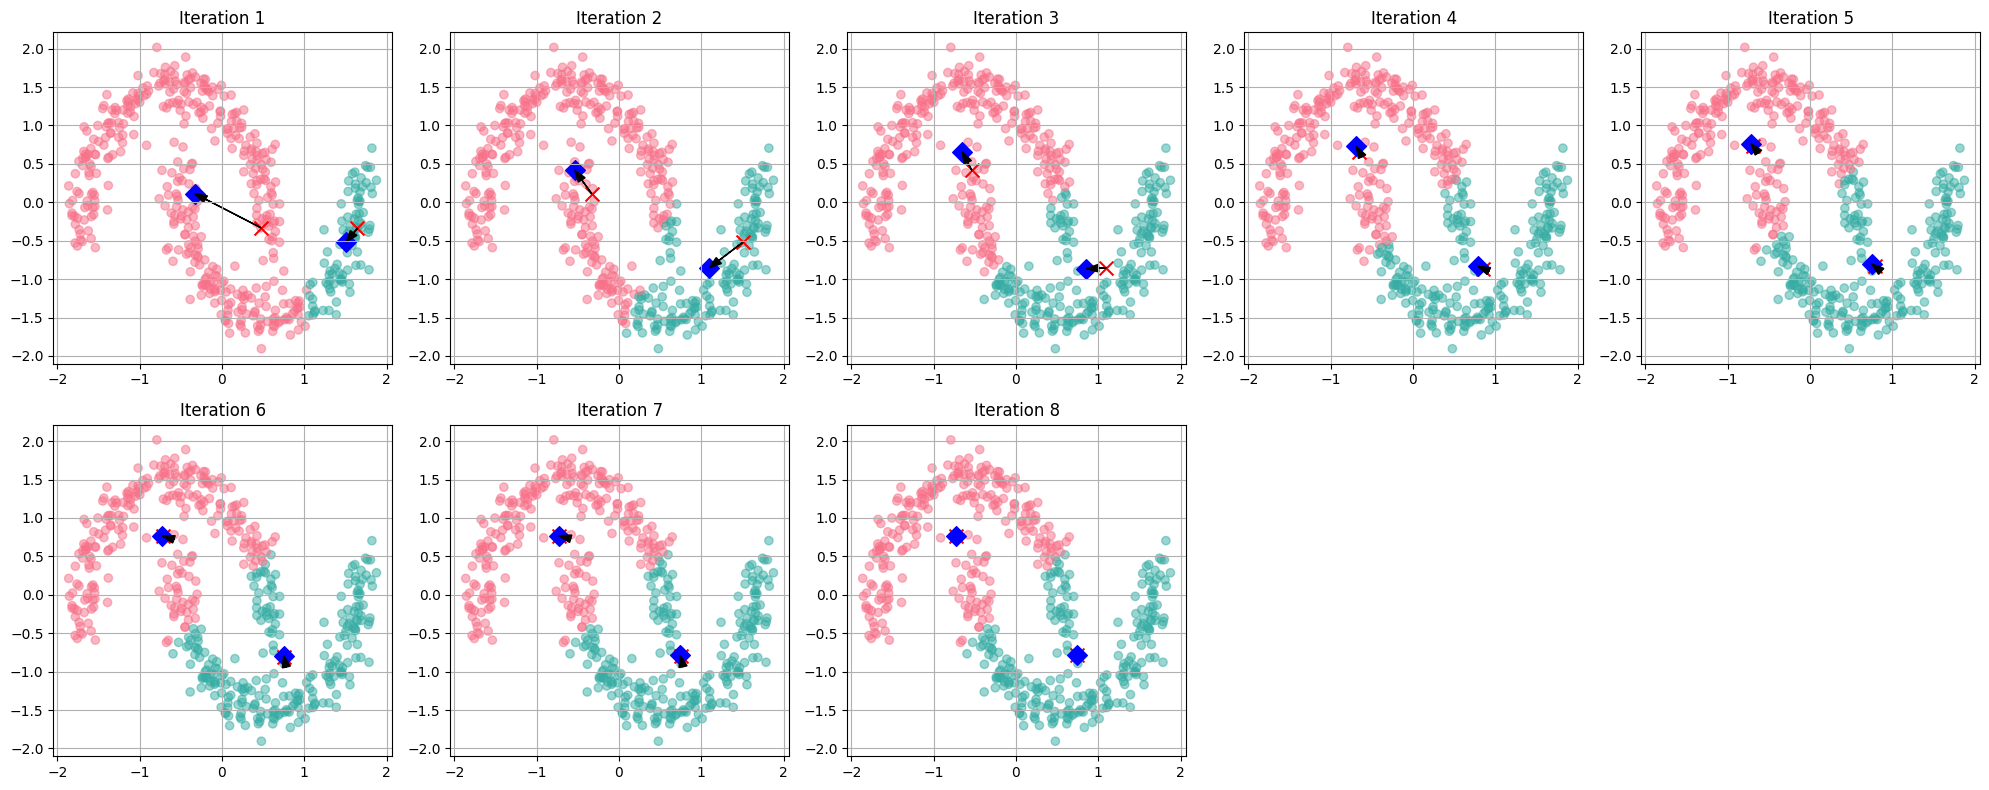

In [ ]:
# Function to calculate Euclidean distance between points
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

# Function to initialize random centroids
def initialize_centroids(X, n_clusters):
    n_samples = X.shape[0]
    centroids = X[np.random.choice(n_samples, n_clusters, replace=False)]
    return centroids

# Function to assign points to the nearest centroid
def assign_clusters(X, centroids):
    distances = np.array([euclidean_distance(X, centroid) for centroid in centroids])
    return np.argmin(distances, axis=0)

# Function to update centroids based on cluster assignments
def update_centroids(X, labels, n_clusters):
    centroids = np.array([X[labels == k].mean(axis=0) for k in range(n_clusters)])
    return centroids

# Function to compute clustering metrics
def compute_metrics(X, labels, true_labels):
    metrics = {}
    metrics['Adjusted Rand Index'] = adjusted_rand_score(true_labels, labels)
    metrics['Silhouette Score'] = silhouette_score(X, labels)
    metrics['V-measure'] = v_measure_score(true_labels, labels)
    metrics['Davies-Bouldin Index'] = davies_bouldin_score(X, labels)
    metrics['Calinski-Harabasz Index'] = calinski_harabasz_score(X, labels)
    metrics['Fowlkes-Mallows Score'] = fowlkes_mallows_score(true_labels, labels)
    metrics['Adjusted Mutual Info'] = adjusted_mutual_info_score(true_labels, labels)
    return metrics

# Updated function to plot centroid shifts in smaller subplots (5 plots per row)
def plot_centroids_shift_multiple(X, labels_list, old_centroids_list, new_centroids_list, iterations):
    n_rows = (iterations + 4) // 5  # To create rows of 5 plots
    fig, axs = plt.subplots(n_rows, 5, figsize=(20, n_rows * 4))

    # Handle the case where axs is 1D if there's only one row
    axs = np.atleast_2d(axs)

    for iteration in range(iterations):
        row = iteration // 5
        col = iteration % 5

        old_centroids = old_centroids_list[iteration]
        new_centroids = new_centroids_list[iteration]

        # Assigning colors based on labels (clusters)
        palette = sns.color_palette("husl", np.unique(labels_list[iteration]).shape[0])
        colors = [palette[label] for label in labels_list[iteration]]

        ax = axs[row, col]
        ax.scatter(X[:, 0], X[:, 1], c=colors, marker='o', alpha=0.5, label='Data points')
        ax.scatter(old_centroids[:, 0], old_centroids[:, 1], c='red', marker='x', s=100, label='Old centroids')
        ax.scatter(new_centroids[:, 0], new_centroids[:, 1], c='blue', marker='D', s=100, label='New centroids')

        for i in range(old_centroids.shape[0]):
            ax.arrow(old_centroids[i, 0], old_centroids[i, 1],
                     new_centroids[i, 0] - old_centroids[i, 0],
                     new_centroids[i, 1] - old_centroids[i, 1],
                     color='black', length_includes_head=True, head_width=0.1)

        ax.set_title(f'Iteration {iteration + 1}')
        ax.grid(True)

    # Hide unused subplots
    total_plots = n_rows * 5
    for i in range(iterations, total_plots):
        row = i // 5
        col = i % 5
        fig.delaxes(axs[row, col])  # Delete the unused axes

    plt.tight_layout()
    plt.show()

# Function to perform K-Means clustering and visualize centroid shifts
def kmeans_with_shifts_multiple_plots(X, n_clusters, true_labels=None, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, n_clusters)

    labels_list = []
    old_centroids_list = []
    new_centroids_list = []

    for iteration in range(max_iters):
        old_centroids = centroids

        # Step 2: Assign clusters
        labels = assign_clusters(X, centroids)

        # Step 3: Update centroids
        centroids = update_centroids(X, labels, n_clusters)

        # Collect labels and centroids for plotting
        labels_list.append(labels)
        old_centroids_list.append(old_centroids)
        new_centroids_list.append(centroids)

        # Step 5: Compute metrics
        if true_labels is not None:
            metrics = compute_metrics(X, labels, true_labels)
            print(f"Iteration {iteration + 1} metrics:")
            for key, value in metrics.items():
                print(f" - {key}: {value:.4f}")

        # Step 6: Check for convergence (if centroids have shifted less than tolerance)
        centroid_shift = np.linalg.norm(centroids - old_centroids)
        print(f"Iteration {iteration + 1}: Centroid shift = {centroid_shift}")
        if centroid_shift < tol:
            print(f"Converged after {iteration + 1} iterations.")
            break

    # Plot all centroid shifts in subplots
    plot_centroids_shift_multiple(X, labels_list, old_centroids_list, new_centroids_list, len(labels_list))

    return labels, centroids

# Running K-Means on Make Moons dataset
n_clusters = 2
labels, final_centroids = kmeans_with_shifts_multiple_plots(X_moons_scaled, n_clusters, true_labels=y_moons)


Iteration 1 metrics:
 - Adjusted Rand Index: 0.0007
 - Silhouette Score: 0.2607
 - V-measure: 0.0020
 - Davies-Bouldin Index: 1.5974
 - Calinski-Harabasz Index: 164.4366
 - Fowlkes-Mallows Score: 0.5003
 - Adjusted Mutual Info: 0.0005
Iteration 1: Centroid shift = 0.862423105479129
Iteration 2 metrics:
 - Adjusted Rand Index: 0.0700
 - Silhouette Score: 0.3565
 - V-measure: 0.0526
 - Davies-Bouldin Index: 1.1065
 - Calinski-Harabasz Index: 355.2551
 - Fowlkes-Mallows Score: 0.5345
 - Adjusted Mutual Info: 0.0512
Iteration 2: Centroid shift = 0.6785171461207786
Iteration 3 metrics:
 - Adjusted Rand Index: 0.3167
 - Silhouette Score: 0.4716
 - V-measure: 0.2435
 - Davies-Bouldin Index: 0.8405
 - Calinski-Harabasz Index: 641.1521
 - Fowlkes-Mallows Score: 0.6577
 - Adjusted Mutual Info: 0.2424
Iteration 3: Centroid shift = 0.4562076416542607
Iteration 4 metrics:
 - Adjusted Rand Index: 0.4345
 - Silhouette Score: 0.4872
 - V-measure: 0.3423
 - Davies-Bouldin Index: 0.8167
 - Calinski-Hara

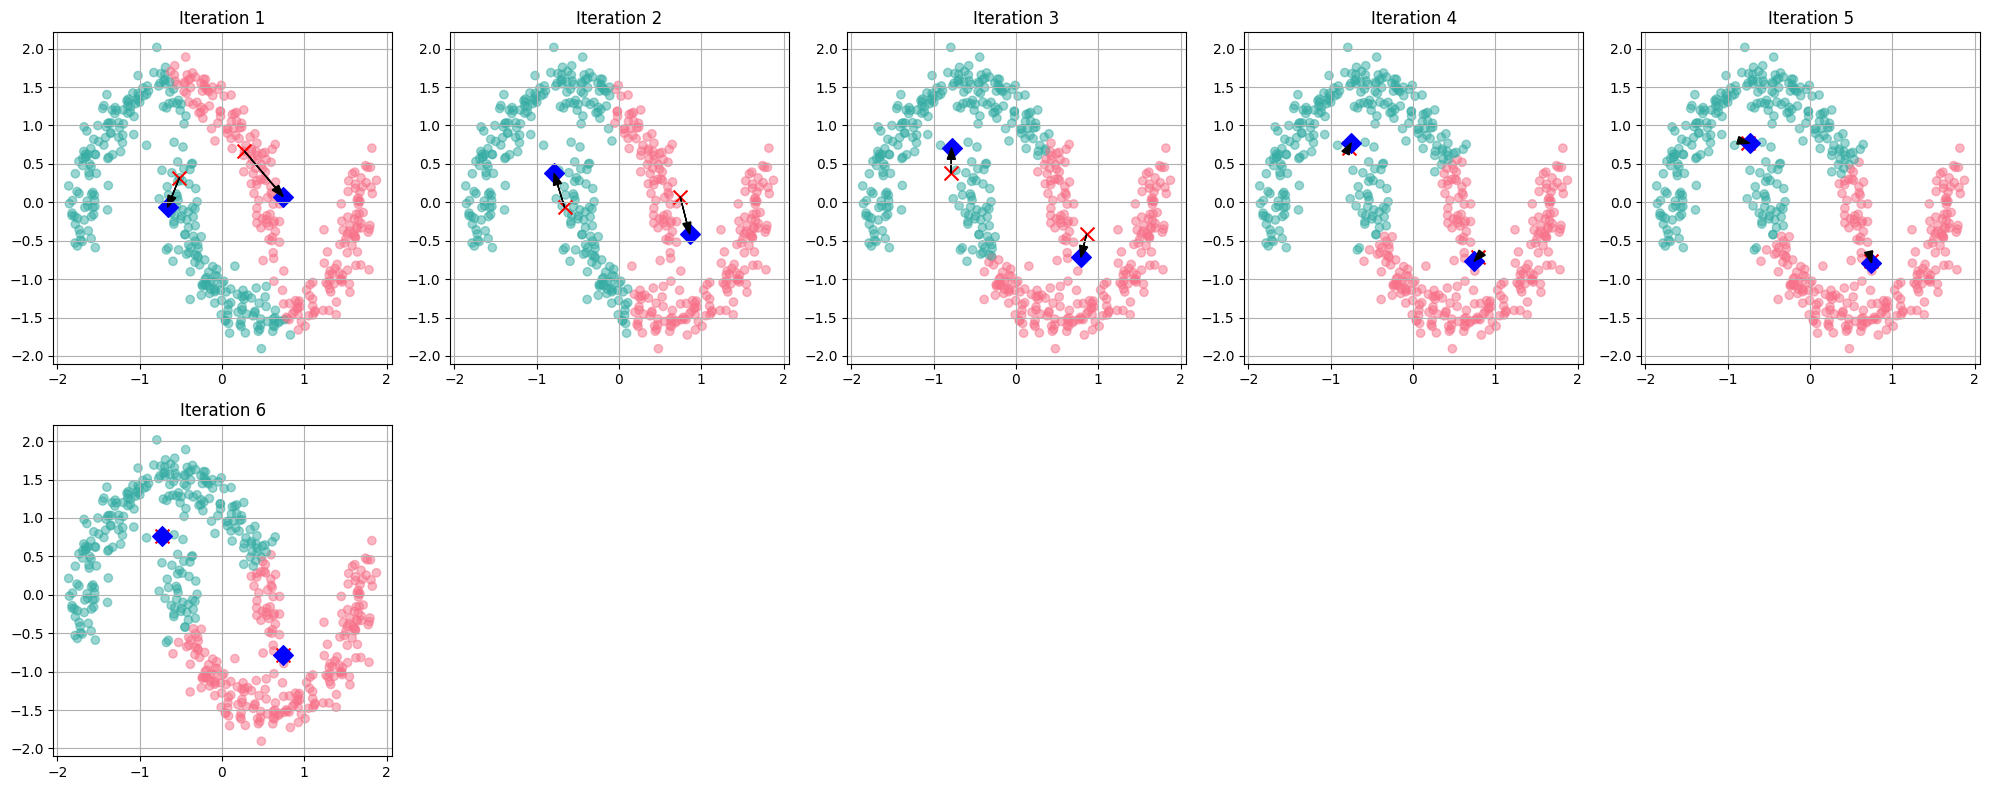

In [ ]:
X_moons, y_moons = make_moons(n_samples=500, noise=0.1)
scaler = StandardScaler()
X_moons_scaled = scaler.fit_transform(X_moons)

# Function to calculate Euclidean distance between points
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

# K-Means++ centroid initialization
def initialize_centroids_kmeans_plus(X, n_clusters):
    n_samples, n_features = X.shape
    centroids = []

    # Step 1: Choose the first centroid randomly
    first_centroid = X[np.random.choice(n_samples)]
    centroids.append(first_centroid)

    # Step 2: Choose subsequent centroids based on distance
    for _ in range(1, n_clusters):
        distances = np.array([min([np.linalg.norm(x - c) ** 2 for c in centroids]) for x in X])
        probabilities = distances / distances.sum()
        cumulative_probabilities = np.cumsum(probabilities)
        r = np.random.rand()
        next_centroid = X[np.searchsorted(cumulative_probabilities, r)]
        centroids.append(next_centroid)

    return np.array(centroids)

# Function to assign points to the nearest centroid
def assign_clusters(X, centroids):
    distances = np.array([euclidean_distance(X, centroid) for centroid in centroids])
    return np.argmin(distances, axis=0)

# Function to update centroids based on cluster assignments
def update_centroids(X, labels, n_clusters):
    centroids = np.array([X[labels == k].mean(axis=0) for k in range(n_clusters)])
    return centroids

# Function to compute clustering metrics
def compute_metrics(X, labels, true_labels):
    metrics = {}
    metrics['Adjusted Rand Index'] = adjusted_rand_score(true_labels, labels)
    metrics['Silhouette Score'] = silhouette_score(X, labels)
    metrics['V-measure'] = v_measure_score(true_labels, labels)
    metrics['Davies-Bouldin Index'] = davies_bouldin_score(X, labels)
    metrics['Calinski-Harabasz Index'] = calinski_harabasz_score(X, labels)
    metrics['Fowlkes-Mallows Score'] = fowlkes_mallows_score(true_labels, labels)
    metrics['Adjusted Mutual Info'] = adjusted_mutual_info_score(true_labels, labels)
    return metrics

# Updated function to plot centroid shifts in smaller subplots (5 plots per row)
def plot_centroids_shift_multiple(X, labels_list, old_centroids_list, new_centroids_list, iterations):
    n_rows = (iterations + 4) // 5  # To create rows of 5 plots
    fig, axs = plt.subplots(n_rows, 5, figsize=(20, n_rows * 4))

    for iteration in range(iterations):
        row = iteration // 5
        col = iteration % 5

        old_centroids = old_centroids_list[iteration]
        new_centroids = new_centroids_list[iteration]

        # Assigning colors based on labels (clusters)
        palette = sns.color_palette("husl", np.unique(labels_list[iteration]).shape[0])
        colors = [palette[label] for label in labels_list[iteration]]

        ax = axs[row, col]
        ax.scatter(X[:, 0], X[:, 1], c=colors, marker='o', alpha=0.5, label='Data points')
        ax.scatter(old_centroids[:, 0], old_centroids[:, 1], c='red', marker='x', s=100, label='Old centroids')
        ax.scatter(new_centroids[:, 0], new_centroids[:, 1], c='blue', marker='D', s=100, label='New centroids')

        for i in range(old_centroids.shape[0]):
            ax.arrow(old_centroids[i, 0], old_centroids[i, 1],
                     new_centroids[i, 0] - old_centroids[i, 0],
                     new_centroids[i, 1] - old_centroids[i, 1],
                     color='black', length_includes_head=True, head_width=0.1)

        ax.set_title(f'Iteration {iteration + 1}')
        ax.grid(True)

    # Hide unused subplots
    total_plots = n_rows * 5
    for i in range(iterations, total_plots):
        row = i // 5
        col = i % 5
        fig.delaxes(axs[row, col])  # Delete the unused axes

    plt.tight_layout()
    plt.show()

# Function to perform K-Means++ clustering and visualize centroid shifts
def kmeans_plus_with_shifts_multiple_plots(X, n_clusters, true_labels=None, max_iters=100, tol=1e-4):
    # Step 1: Initialize centroids using K-Means++
    centroids = initialize_centroids_kmeans_plus(X, n_clusters)

    labels_list = []
    old_centroids_list = []
    new_centroids_list = []

    for iteration in range(max_iters):
        old_centroids = centroids

        # Step 2: Assign clusters
        labels = assign_clusters(X, centroids)

        # Step 3: Update centroids
        centroids = update_centroids(X, labels, n_clusters)

        # Collect labels and centroids for plotting
        labels_list.append(labels)
        old_centroids_list.append(old_centroids)
        new_centroids_list.append(centroids)

        # Step 5: Compute metrics
        if true_labels is not None:
            metrics = compute_metrics(X, labels, true_labels)
            print(f"Iteration {iteration + 1} metrics:")
            for key, value in metrics.items():
                print(f" - {key}: {value:.4f}")

        # Step 6: Check for convergence (if centroids have shifted less than tolerance)
        centroid_shift = np.linalg.norm(centroids - old_centroids)
        print(f"Iteration {iteration + 1}: Centroid shift = {centroid_shift}")
        if centroid_shift < tol:
            print(f"Converged after {iteration + 1} iterations.")
            break

    # Plot all centroid shifts in subplots
    plot_centroids_shift_multiple(X, labels_list, old_centroids_list, new_centroids_list, len(labels_list))

    return labels, centroids

# Running K-Means++ on Make Moons dataset
n_clusters = 2
labels, final_centroids = kmeans_plus_with_shifts_multiple_plots(X_moons_scaled, n_clusters, true_labels=y_moons)
